In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/My Drive/생물정보학실습데이터/final_data.HepG2.Histone.Enhancer.csv')

In [2]:
df = pd.read_csv('22_final_data.HepG2.Histone.Enhancer.csv')

In [3]:
df

,Pos,gene_name,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
0,chr10:100216834-100995619,HPSE2,0.00000,0.0,0.0,5.81644,0.00000,0.0,0.0,0.0,0.0,1
1,chr10:101156627-101190381,GOT1,0.00000,0.0,0.0,3.98603,0.00000,0.0,0.0,0.0,0.0,1
2,chr10:101286107-101290934,LINC01475,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
3,chr10:101286705-101288224,AL513542.1,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
4,chr10:101292699-101296281,NKX2-3,8.02894,0.0,0.0,13.50215,9.78393,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7129,chrX:9217960-9243246,AC003684.1,0.00000,0.0,0.0,4.01233,0.00000,0.0,0.0,0.0,0.0,1
7130,chrX:9983294-10112514,WWC3,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1
7131,chrX:99899192-99930785,SRPX2,0.00000,0.0,0.0,0.00000,4.75055,0.0,0.0,0.0,0.0,1
7132,chrX:9992882-10006694,WWC3-AS1,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1


In [ ]:
!pip install missingno

<AxesSubplot:>

<AxesSubplot:>

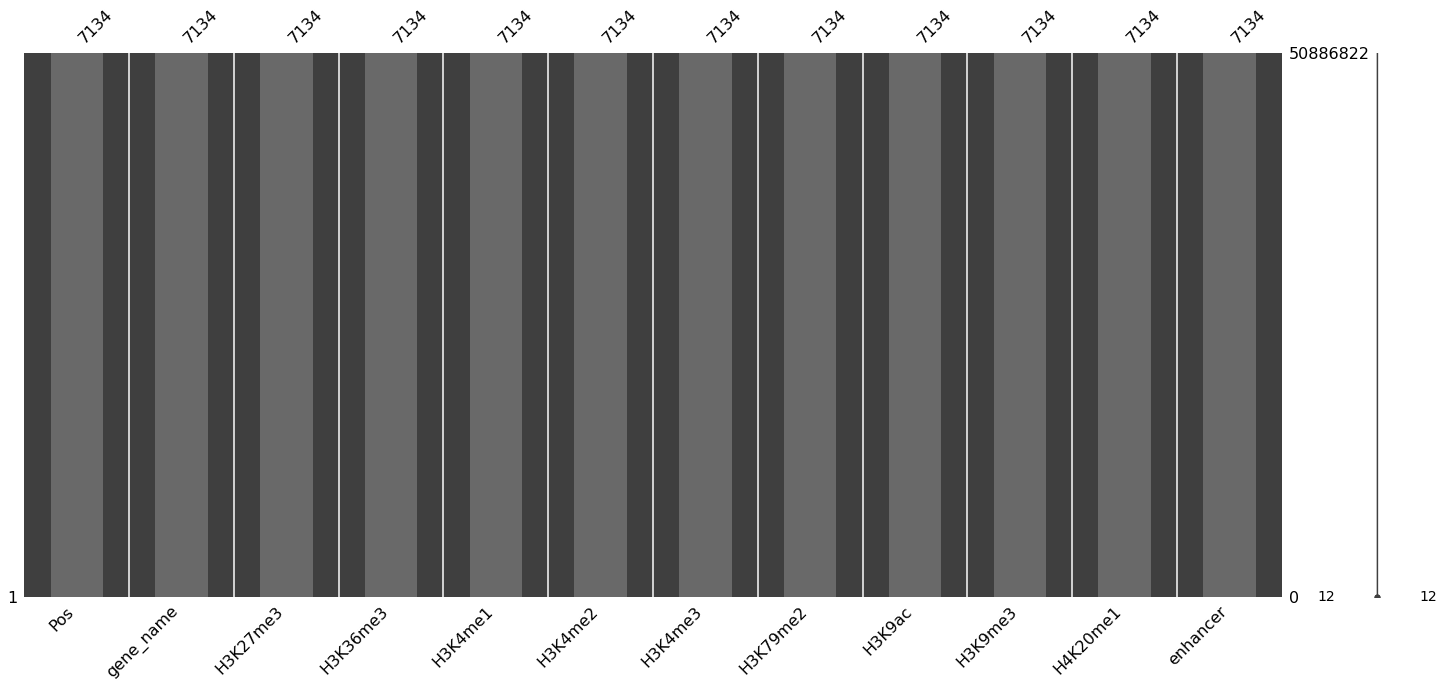

In [25]:
# 결측치 확인
import missingno as msno
display(msno.matrix(df))
display(msno.bar(df))

IndexError: index 0 is out of bounds for axis 0 with size 0

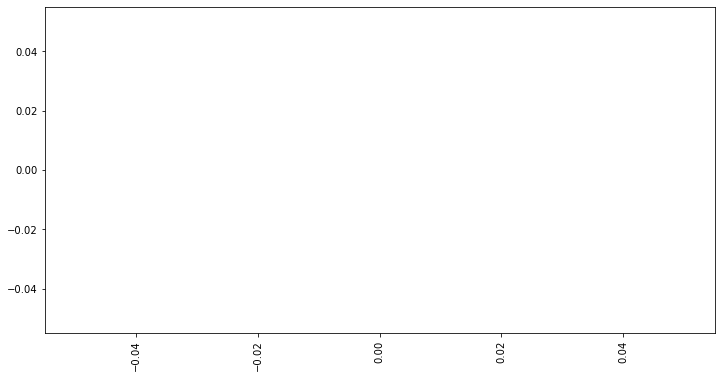

In [19]:
# missing = df.isnull().sum()
# missing = missing[missing > 0]
# missing.sort_values(inplace=True)
# missing.plot.bar(figsize = (12,6))

In [20]:
df.describe()

,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
count,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000
mean,1.425158,0.050376,0.925676,3.088716,3.559854,0.403111,0.898378,0.014459,0.195311,0.718531
std,2.576891,0.452893,1.989047,4.554636,5.405610,1.528361,2.660705,0.225790,0.911769,0.449747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.837962,0.000000,0.000000,5.318980,5.245690,0.000000,0.000000,0.000000,0.000000,1.000000
max,11.941240,6.326480,12.311430,34.643940,53.946900,20.411030,83.300270,5.899290,7.821960,1.000000


# Train Random Forest

In [21]:
df.head()

,Pos,gene_name,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
0,chr10:100216834-100995619,HPSE2,0.00000,0.0,0.0,5.81644,0.00000,0.0,0.0,0.0,0.0,1
1,chr10:101156627-101190381,GOT1,0.00000,0.0,0.0,3.98603,0.00000,0.0,0.0,0.0,0.0,1
2,chr10:101286107-101290934,LINC01475,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
3,chr10:101286705-101288224,AL513542.1,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
4,chr10:101292699-101296281,NKX2-3,8.02894,0.0,0.0,13.50215,9.78393,0.0,0.0,0.0,0.0,0


In [22]:
df.values

array([['chr10:100216834-100995619', 'HPSE2', 0.0, ..., 0.0, 0.0, 1],
       ['chr10:101156627-101190381', 'GOT1', 0.0, ..., 0.0, 0.0, 1],
       ['chr10:101286107-101290934', 'LINC01475', 7.41865, ..., 0.0, 0.0,
        0],
       ...,
       ['chrX:99899192-99930785', 'SRPX2', 0.0, ..., 0.0, 0.0, 1],
       ['chrX:9992882-10006694', 'WWC3-AS1', 0.0, ..., 0.0, 0.0, 1],
       ['chrY:16634453-16957530', 'NLGN4Y', 0.0, ..., 0.0, 0.0, 1]],
      dtype=object)

In [27]:
X_features = df.values[:,2:-1].astype('float')
y_target = df.values[:, -1].astype('float')

In [28]:
X_features

array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [7.41865, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]])

In [29]:
y_target

array([1., 1., 0., ..., 1., 1., 1.])

In [30]:
# 0과 1의 정답셋의 비율을 살펴본다.
np.bincount(y_target.astype(int))

# 균형이 맞지 않는 imbalanced data이므로, 이것을 방지해주기 위해 class_weight라는 parameter를 설정해준다.

array([2008, 5126])

In [31]:
# TODO PerfectGuide보고 HP튜닝 내용 보충하기.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = list(range(1,30))
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# 연속형 범주나 많은 범주를 가진 feature들을 과대평가하는 경향이 있기 때문에 이를 완화시키는 옵션
# mean_impurity_decrease = 0 # float 형태. -> 시간이 너무 오래걸려서 뺌

class_weight = ['balanced', 'balanced_subsample']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight}

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2)

In [32]:
import multiprocessing

multiprocessing.cpu_count()

10

In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 4)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=False, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.8s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=29, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=Tr

/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.2s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total

/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   5.0s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   5.0s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   3.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   5.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=21, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, cl

/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=24, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=120

/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.8s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.9s
[CV] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=29, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=29, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.2s
[CV] END boo

/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   5.1s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   5.0s


/opt/anaconda3/envs/lab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


KeyboardInterrupt: 

In [ ]:
rf_random.cv_results_

In [ ]:
rf_random.best_estimator_

In [ ]:
rf_random.best_score_

In [ ]:
rf_random.best_params_

In [ ]:
best_model = rf_random.best_estimator_

# Plot feature importnace

In [ ]:
best_model.feature_importances_

In [ ]:
feature = df.columns[2:-1]

In [ ]:
feature_df = pd.DataFrame(best_model.feature_importances_, columns = ['Value'])
feature_df.index = feature

In [ ]:
feature_df

In [ ]:
feature_df.plot(kind='barh', title = 'Feature importance')

In [ ]:
test_result = best_model.predict(xTest)

In [ ]:
best_model.score(xTest, yTest)

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

pred = best_model.predict(xTest)
confusion_matrix(yTest, pred)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, xTest, yTest) 

In [ ]:
best_model.predict_proba(xTest)

In [ ]:
best_model.predict_proba(xTest)[:, 0]

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(yTest, best_model.predict_proba(xTest)[:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yTest.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0],
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

metrics.plot_roc_curve(best_model, xTest, yTest)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

# Automl로 쉽게 hyperparameter tuning 하기

In [24]:
!pip install -U pycaret

In [25]:
df

,Pos,gene_name,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
0,chr10:100216834-100995619,HPSE2,0.00000,0.0,0.0,5.81644,0.00000,0.0,0.0,0.0,0.0,1
1,chr10:101156627-101190381,GOT1,0.00000,0.0,0.0,3.98603,0.00000,0.0,0.0,0.0,0.0,1
2,chr10:101286107-101290934,LINC01475,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
3,chr10:101286705-101288224,AL513542.1,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
4,chr10:101292699-101296281,NKX2-3,8.02894,0.0,0.0,13.50215,9.78393,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7020,chrX:9217960-9243246,AC003684.1,0.00000,0.0,0.0,4.01233,0.00000,0.0,0.0,0.0,0.0,1
7021,chrX:9983294-10112514,WWC3,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1
7022,chrX:99899192-99930785,SRPX2,0.00000,0.0,0.0,0.00000,4.75055,0.0,0.0,0.0,0.0,1
7023,chrX:9992882-10006694,WWC3-AS1,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1


In [26]:
df['enhancer'] = df['enhancer'].astype('int')

In [27]:
import pycaret
pycaret.__version__

'2.3.4'

In [31]:
from pycaret.classification import * 

clf1 = setup(data = df, target = 'enhancer', 
             ignore_features = ['Pos','gene_name'],
             session_id=123)

,Description,Value
0,session_id,123
1,Target,enhancer
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7025, 12)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [30]:
# check the model library to see all models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [32]:
# train rf model using 5 fold CV
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9085,0.9482,0.9480,0.9272,0.9375,0.7671,0.7678
1,0.8892,0.9363,0.9213,0.9252,0.9233,0.7240,0.7240
2,0.9135,0.9292,0.9480,0.9336,0.9408,0.7807,0.7810
3,0.9013,0.9402,0.9326,0.9313,0.9319,0.7526,0.7526
4,0.9023,0.9370,0.9298,0.9350,0.9324,0.7566,0.7566
Mean,0.9030,0.9382,0.9360,0.9305,0.9332,0.7562,0.7564
SD,0.0082,0.0062,0.0105,0.0037,0.0059,0.0188,0.0190


In [33]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9390,0.9588,0.9691,0.9478,0.9583,0.8447,0.8455
1,0.9126,0.9392,0.9551,0.9264,0.9405,0.7759,0.7772
2,0.9187,0.9531,0.9494,0.9389,0.9441,0.7949,0.7951
3,0.9024,0.9325,0.9410,0.9254,0.9331,0.7527,0.7531
4,0.9207,0.9510,0.9579,0.9342,0.9459,0.7977,0.7986
5,0.9106,0.9264,0.9551,0.9239,0.9392,0.7702,0.7717
6,0.8943,0.9187,0.9466,0.9108,0.9284,0.7271,0.7291
7,0.9165,0.9504,0.9466,0.9387,0.9427,0.7891,0.7892
8,0.9063,0.9376,0.9382,0.9330,0.9356,0.7639,0.7640
9,0.8921,0.9323,0.9326,0.9197,0.9261,0.7261,0.7264


In [41]:
import os
import sys
sys.version

'3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]'

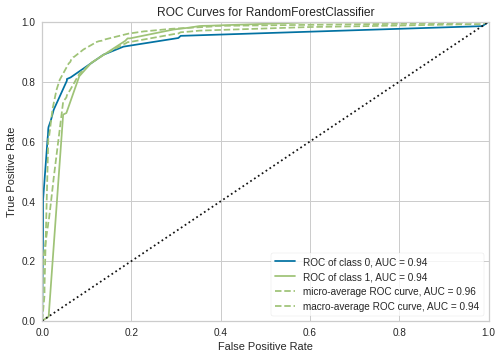

In [34]:
plot_model(tuned_rf, plot = 'auc')

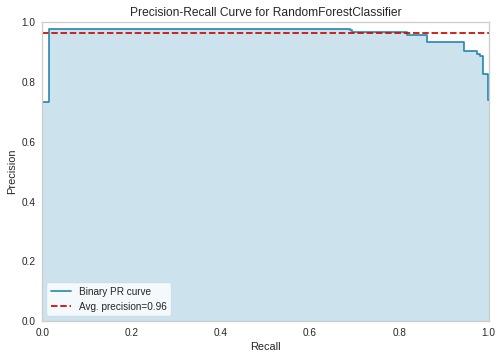

In [35]:
plot_model(tuned_rf, plot = 'pr')

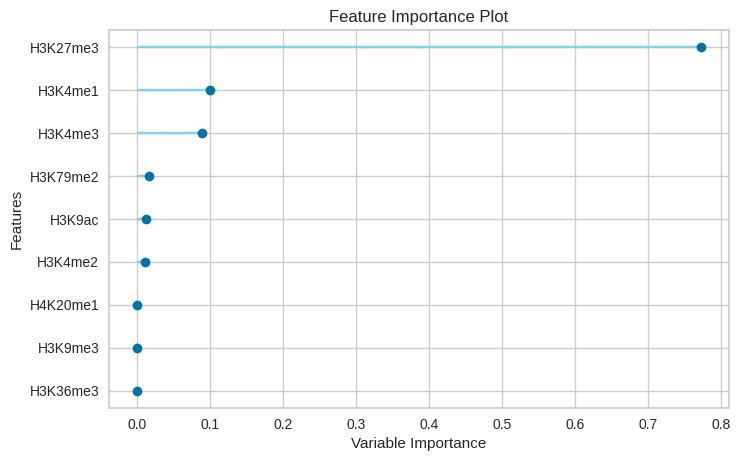

In [36]:
plot_model(tuned_rf, plot='feature')

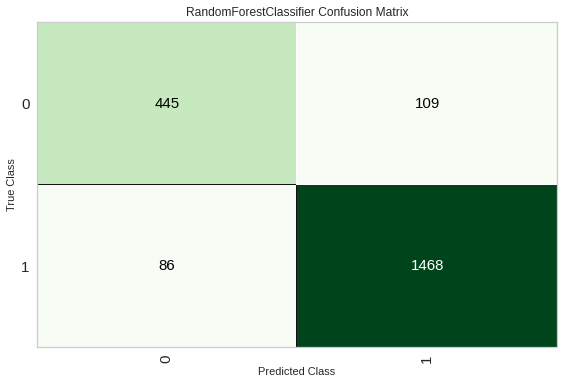

In [37]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [43]:
evaluate_model(tuned_rf)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
best_model = compare_models()

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

In [ ]:
X = df.values[:,2:-1].astype('float')
y = df.values[:, -1].astype('float')

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

In [ ]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=xTrain, label = yTrain)
dtest = xgb.DMatrix(data=xTest, label=yTest)

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

In [ ]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(yTest, preds)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)